### K Nearest Neighbours

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=1000, centers=2)
print (x.shape, y.shape)

(1000, 2) (1000,)


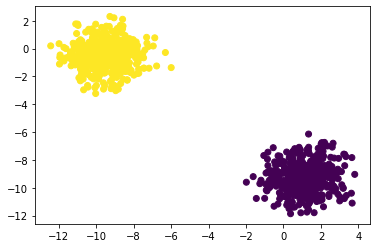

In [15]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [16]:
query_x = np.array([3,2])

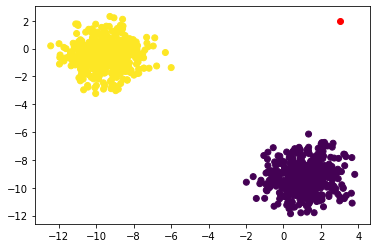

In [17]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.scatter(query_x[0],query_x[1],color = 'red')
plt.show()

### Algorithm

In [18]:
#function to compute distance b/w 2 points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
m = x.shape[0]

def knn(x,y,query_x,k):
    #making list of distance of points from query point
    dist_list = []
    for i in range(m):
        d = dist(query_x,x[i])
        dist_list.append((d,y[i]))
    
    #sorting points acc to dist
    dist_list = sorted(dist_list)
    #selecting k closest points
    dist_list = dist_list[:k]
    
    #converting list to array
    dist_list = np.array(dist_list)
    #extracting count of each label 
    new_vals = np.unique(dist_list[:,1],return_counts = True) 
    idx = np.argmax(new_vals[1])
    pred = new_vals[0][idx]
    
    #returning label with max count
    return pred
    
d = knn(x,y,query_x,k = 500)
print(d)

0.0


### Recognising Handwritten digits on MNIST dataset

In [28]:
df = pd.read_csv('mnist_train.csv')

In [29]:
df.head(n = 5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
values = df.values

In [31]:
x = values[:,1:]
y = values[:,0]

In [32]:
from sklearn.model_selection import train_test_split as tts
xT,xt,yT,yt = tts(x,y,test_size = 0.2)

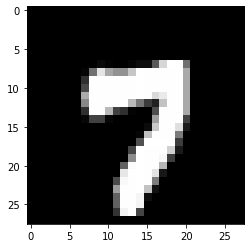

In [40]:
def draw_img(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap = 'gray')

#testing on 4th training data
draw_img(xt[3])

In [39]:
pred = knn(xT,yT,xt[3],k = 100)
print(pred)

7.0


In [36]:
#computing accuracy of knn
def accuracy(xT,xt,yT,yt):
    m = xt.shape[0]
    cc = 0
    n = int(m/100)
    for i in range(n):
        pred = knn(xT,yT,xt[i],k = 100)
        if pred == yt[i]:
            cc +=1
    a = (cc/n)*100
    return a
a = accuracy(xT,xt,yT,yt)
print(a)

79.16666666666666
